In [1]:
import sys
#!{sys.executable} -m pip install numpy
#!{sys.executable} -m pip install cv2
#!{sys.executable} -m pip install matplotlib.pyplot
!{sys.executable} -m pip install pydicom
!{sys.executable} -m pip install scikit-image
import numpy as np
import cv2
import pydicom
import matplotlib.pyplot as plt
from skimage.filters import (threshold_otsu,sobel, threshold_triangle, threshold_niblack, threshold_sauvola)
from skimage import img_as_ubyte


In [2]:
def make_jan(image, janelamento: list):
        """Janelamento : Lista com o valor mínimo e máximo de janela, transforma esse valor em um array numpy"""
        min_valor = min(janelamento)
        max_valor = max(janelamento)
        imagem_janelada = np.copy(image)
        imagem_janelada[image < min_valor] = min_valor
        imagem_janelada[image > max_valor] = max_valor
        return imagem_janelada

### Lendo a imagem médica

In [3]:
path = "avc-pacientes-renomeados/101-150/Paciente124 (16).dcm"
img_dc = pydicom.dcmread(path)

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.55493e+05, 0.00000e+00, 5.02000e+02,
        0.00000e+00, 5.37000e+02, 0.00000e+00, 6.25000e+02, 0.00000e+00,
        6.35000e+02, 0.00000e+00, 7.35000e+02, 0.00000e+00, 8.44000e+02,
        0.00000e+00, 1.10000e+03, 0.00000e+00, 1.24000e+03, 0.00000e+00,
        1.28100e+03, 0.00000e+00, 1.46000e+03, 0.00000e+00, 1.70200e+03,
        0.00000e+00, 1.80800e+03, 0.00000e+00, 2.16600e+03, 0.00000e+00,
        2.35500e+03, 0.00000e+00, 2.74300e+03, 0.00000e+00, 2.95900e+03,
        0.00000e+00, 3.02500e+03, 0.00000e+00, 3.00700e+03, 0.00000e+00,
        3.21400e+03, 0.00000e+00, 3.39000e+03, 0.00000e+00, 3.45200e+03,
        0.00000e+00, 3.50000e+03, 0.00000e+00, 3.36200e+03, 0.00000e+00,
        3.11400e+03, 0.00000e+00, 3.06900e+03, 0.00

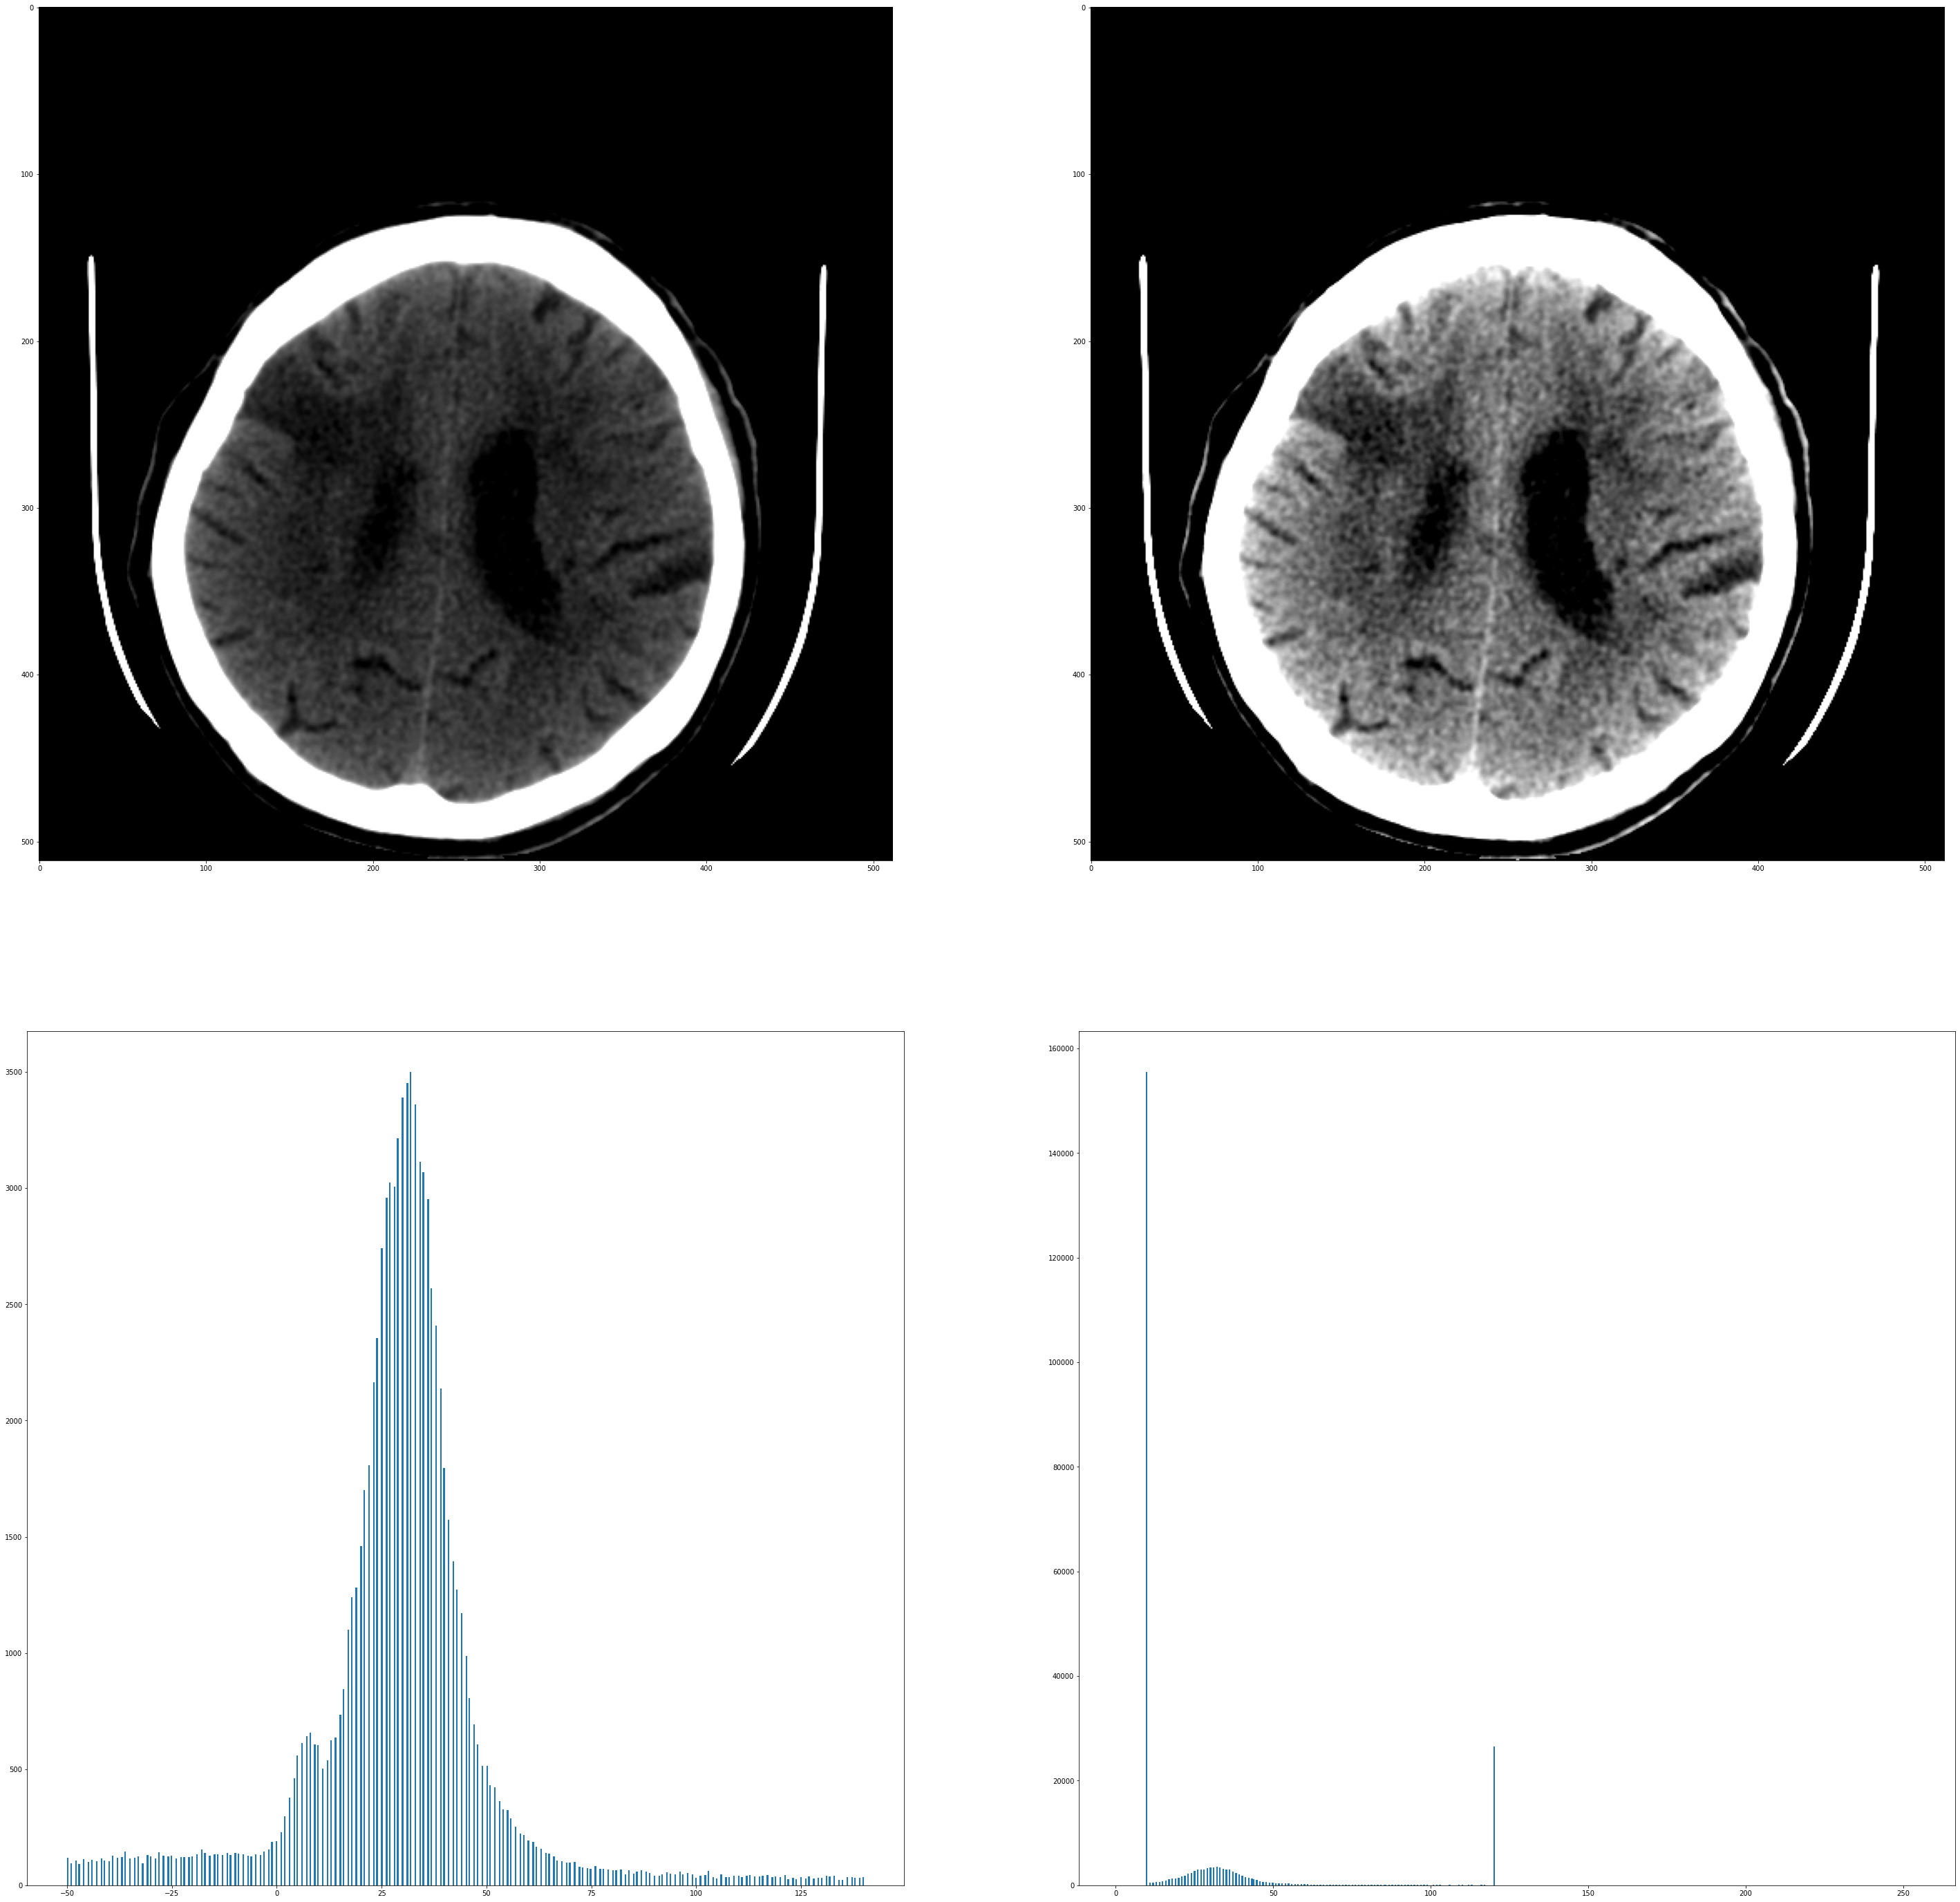

In [6]:
fig,ax = plt.subplots(2,2,figsize = (50,50))

janelamento = [10,120]
img_jan = make_jan(image = img_dc.pixel_array,janelamento = janelamento)

ax[0,0].imshow(img_jan,cmap = "gray")
ax[1,0].hist(img_dc.pixel_array.ravel(),500,[-50,140])


#janelamento2 

janelamento2 = [10,60]
img_jan2 = make_jan(image = img_dc.pixel_array,janelamento = janelamento2)

ax[0,1].imshow(img_jan2,cmap = "gray")
ax[1,1].hist(img_jan.ravel(),500,[1,254])

In [ ]:
janelamento

In [ ]:
#np.max(img_jan)
#print(img_jan.shape())
#gray = cv2.cvtColor(img_jan, cv2.COLOR_BGR2GRAY)
#cv2.imshow("legenda",img_jan)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

### Fazendo a limiarização por otsu

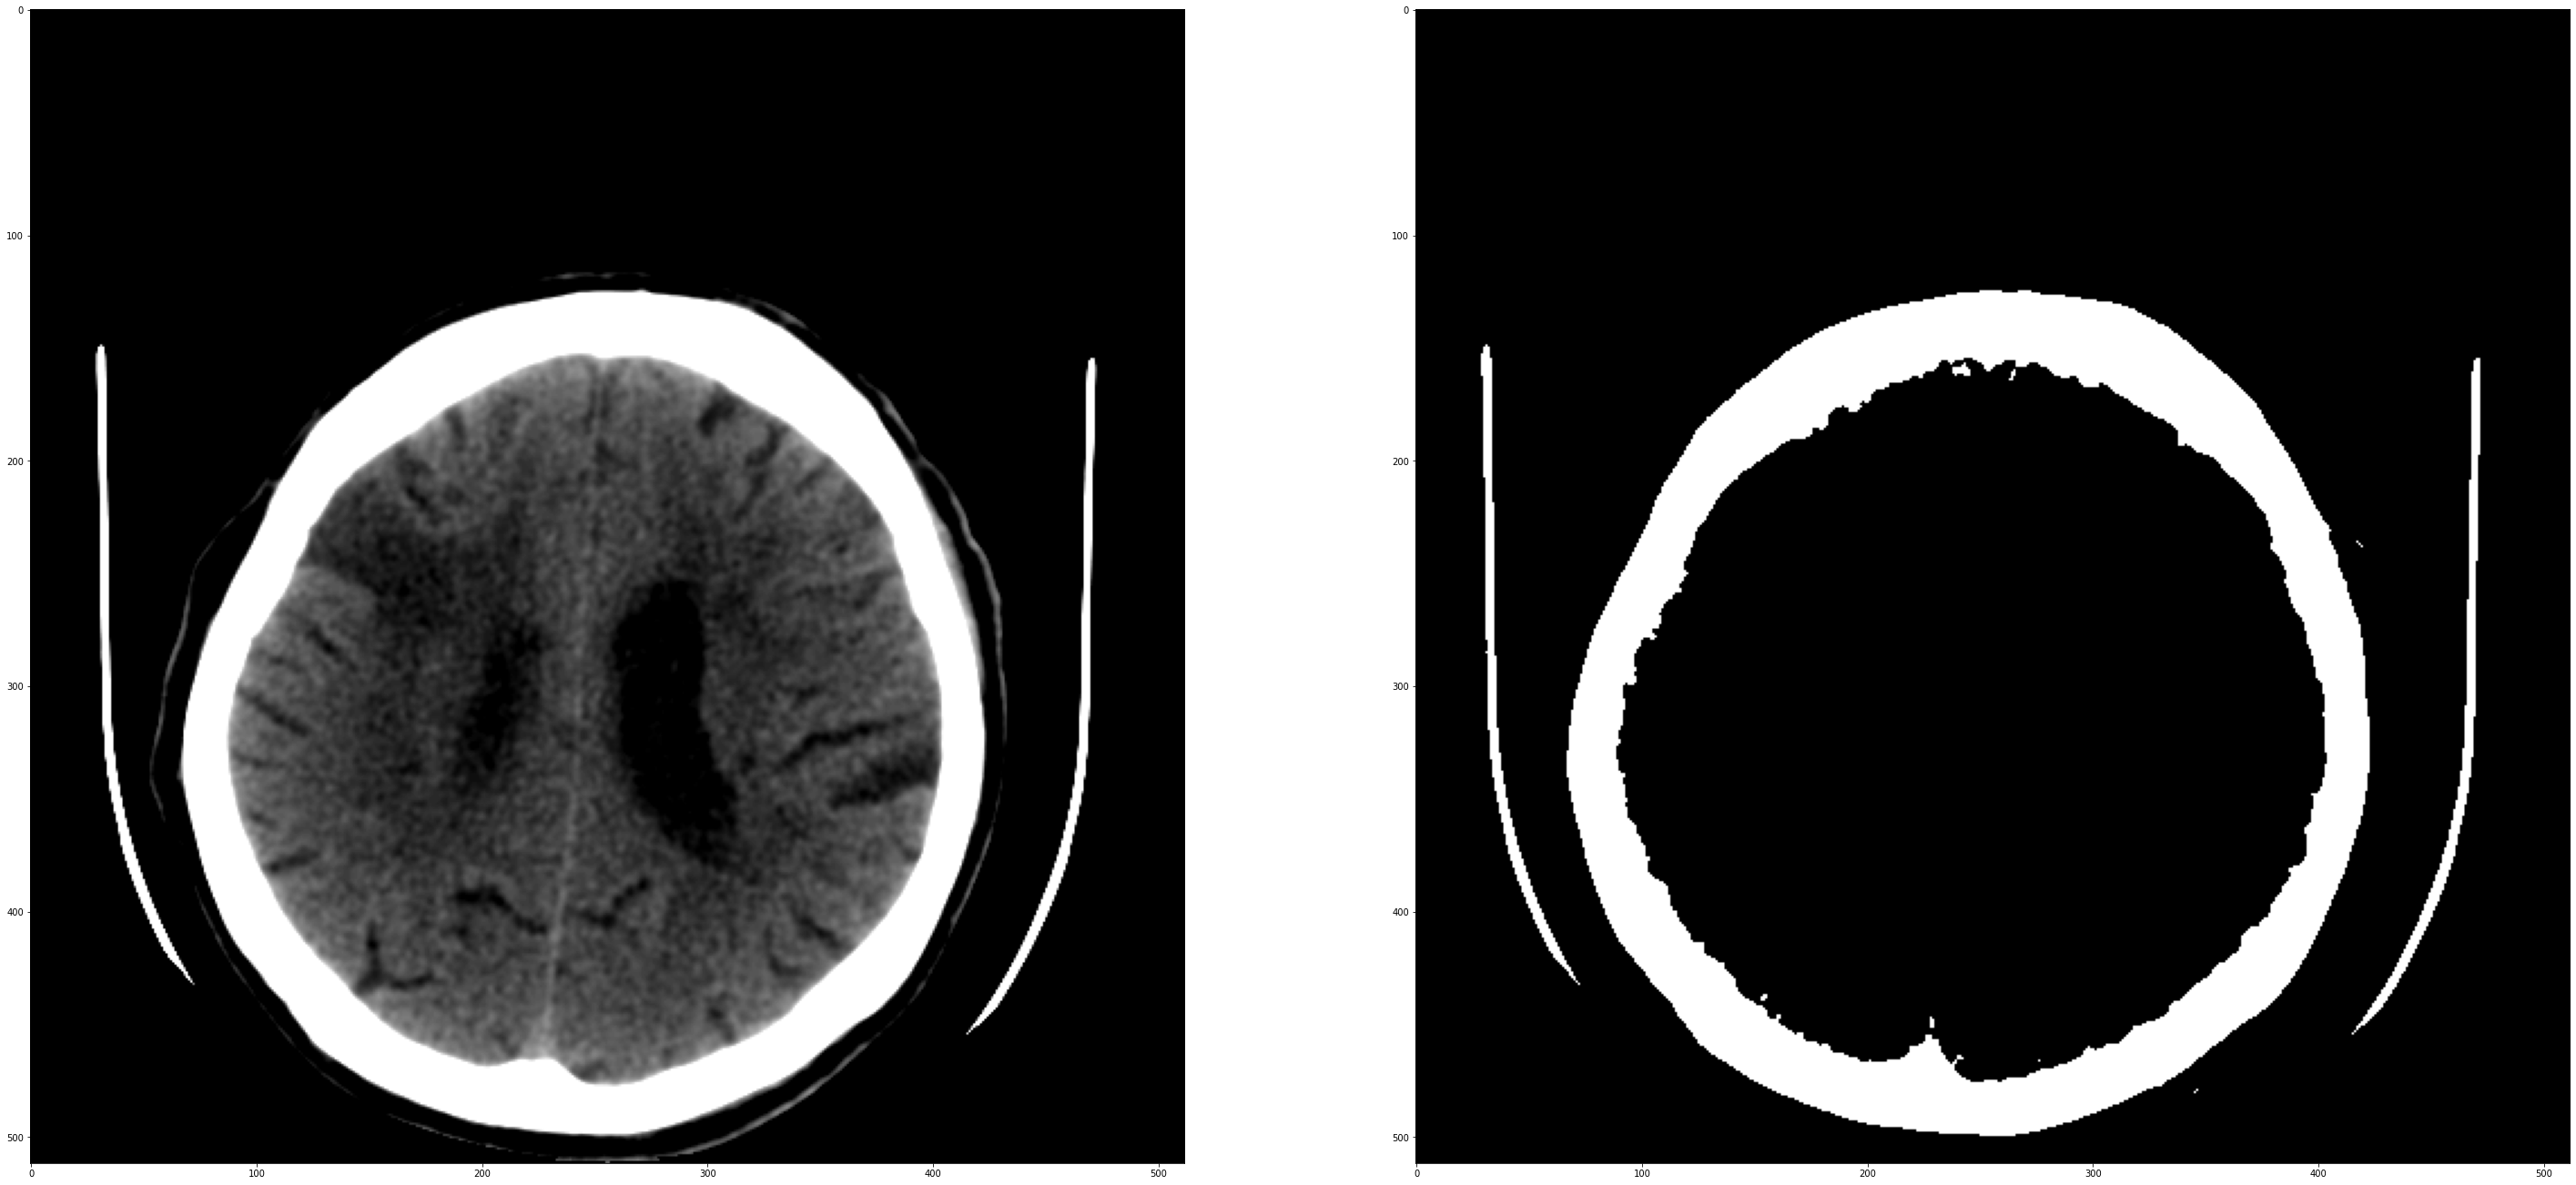

In [9]:
img = img_jan

janelamento_otsu = np.arange(10,100)
img_jan_otsu = make_jan(image = img_dc.pixel_array,janelamento = janelamento_otsu)
thresh_otsu = threshold_otsu(img_jan_otsu)
binary_img_1 = img_jan_otsu > thresh_otsu
binary_img_1 = img_as_ubyte(binary_img_1)
fig,ax = plt.subplots(1,2,figsize=(50,50))
ax[0].imshow(img_jan_otsu,cmap = "gray")
ax[1].imshow(binary_img_1,cmap = "gray")

### Aplicando sobel:

(array([ 119.,    0.,   95.,    0.,    0.,  106.,    0.,   93.,    0.,
           0.,  113.,    0.,    0.,  102.,    0.,  109.,    0.,    0.,
         104.,    0.,    0.,  116.,    0.,  106.,    0.,    0.,  103.,
           0.,  128.,    0.,    0.,  118.,    0.,    0.,  121.,    0.,
         145.,    0.,    0.,  115.,    0.,    0.,  118.,    0.,  123.,
           0.,    0.,   96.,    0.,    0.,  129.,    0.,  124.,    0.,
           0.,  115.,    0.,  142.,    0.,    0.,  126.,    0.,    0.,
         124.,    0.,  128.,    0.,    0.,  116.,    0.,    0.,  120.,
           0.,  120.,    0.,    0.,  120.,    0.,  124.,    0.,    0.,
         134.,    0.,    0.,  154.,    0.,  140.,    0.,    0.,  127.,
           0.,    0.,  134.,    0.,  133.,    0.,    0.,  130.,    0.,
           0.,  139.,    0.,  130.,    0.,    0.,  139.,    0.,  136.,
           0.,    0.,  134.,    0.,    0.,  126.,    0.,  125.,    0.,
           0.,  132.,    0.,    0.,  130.,    0.,  144.,    0.,    0.,
      

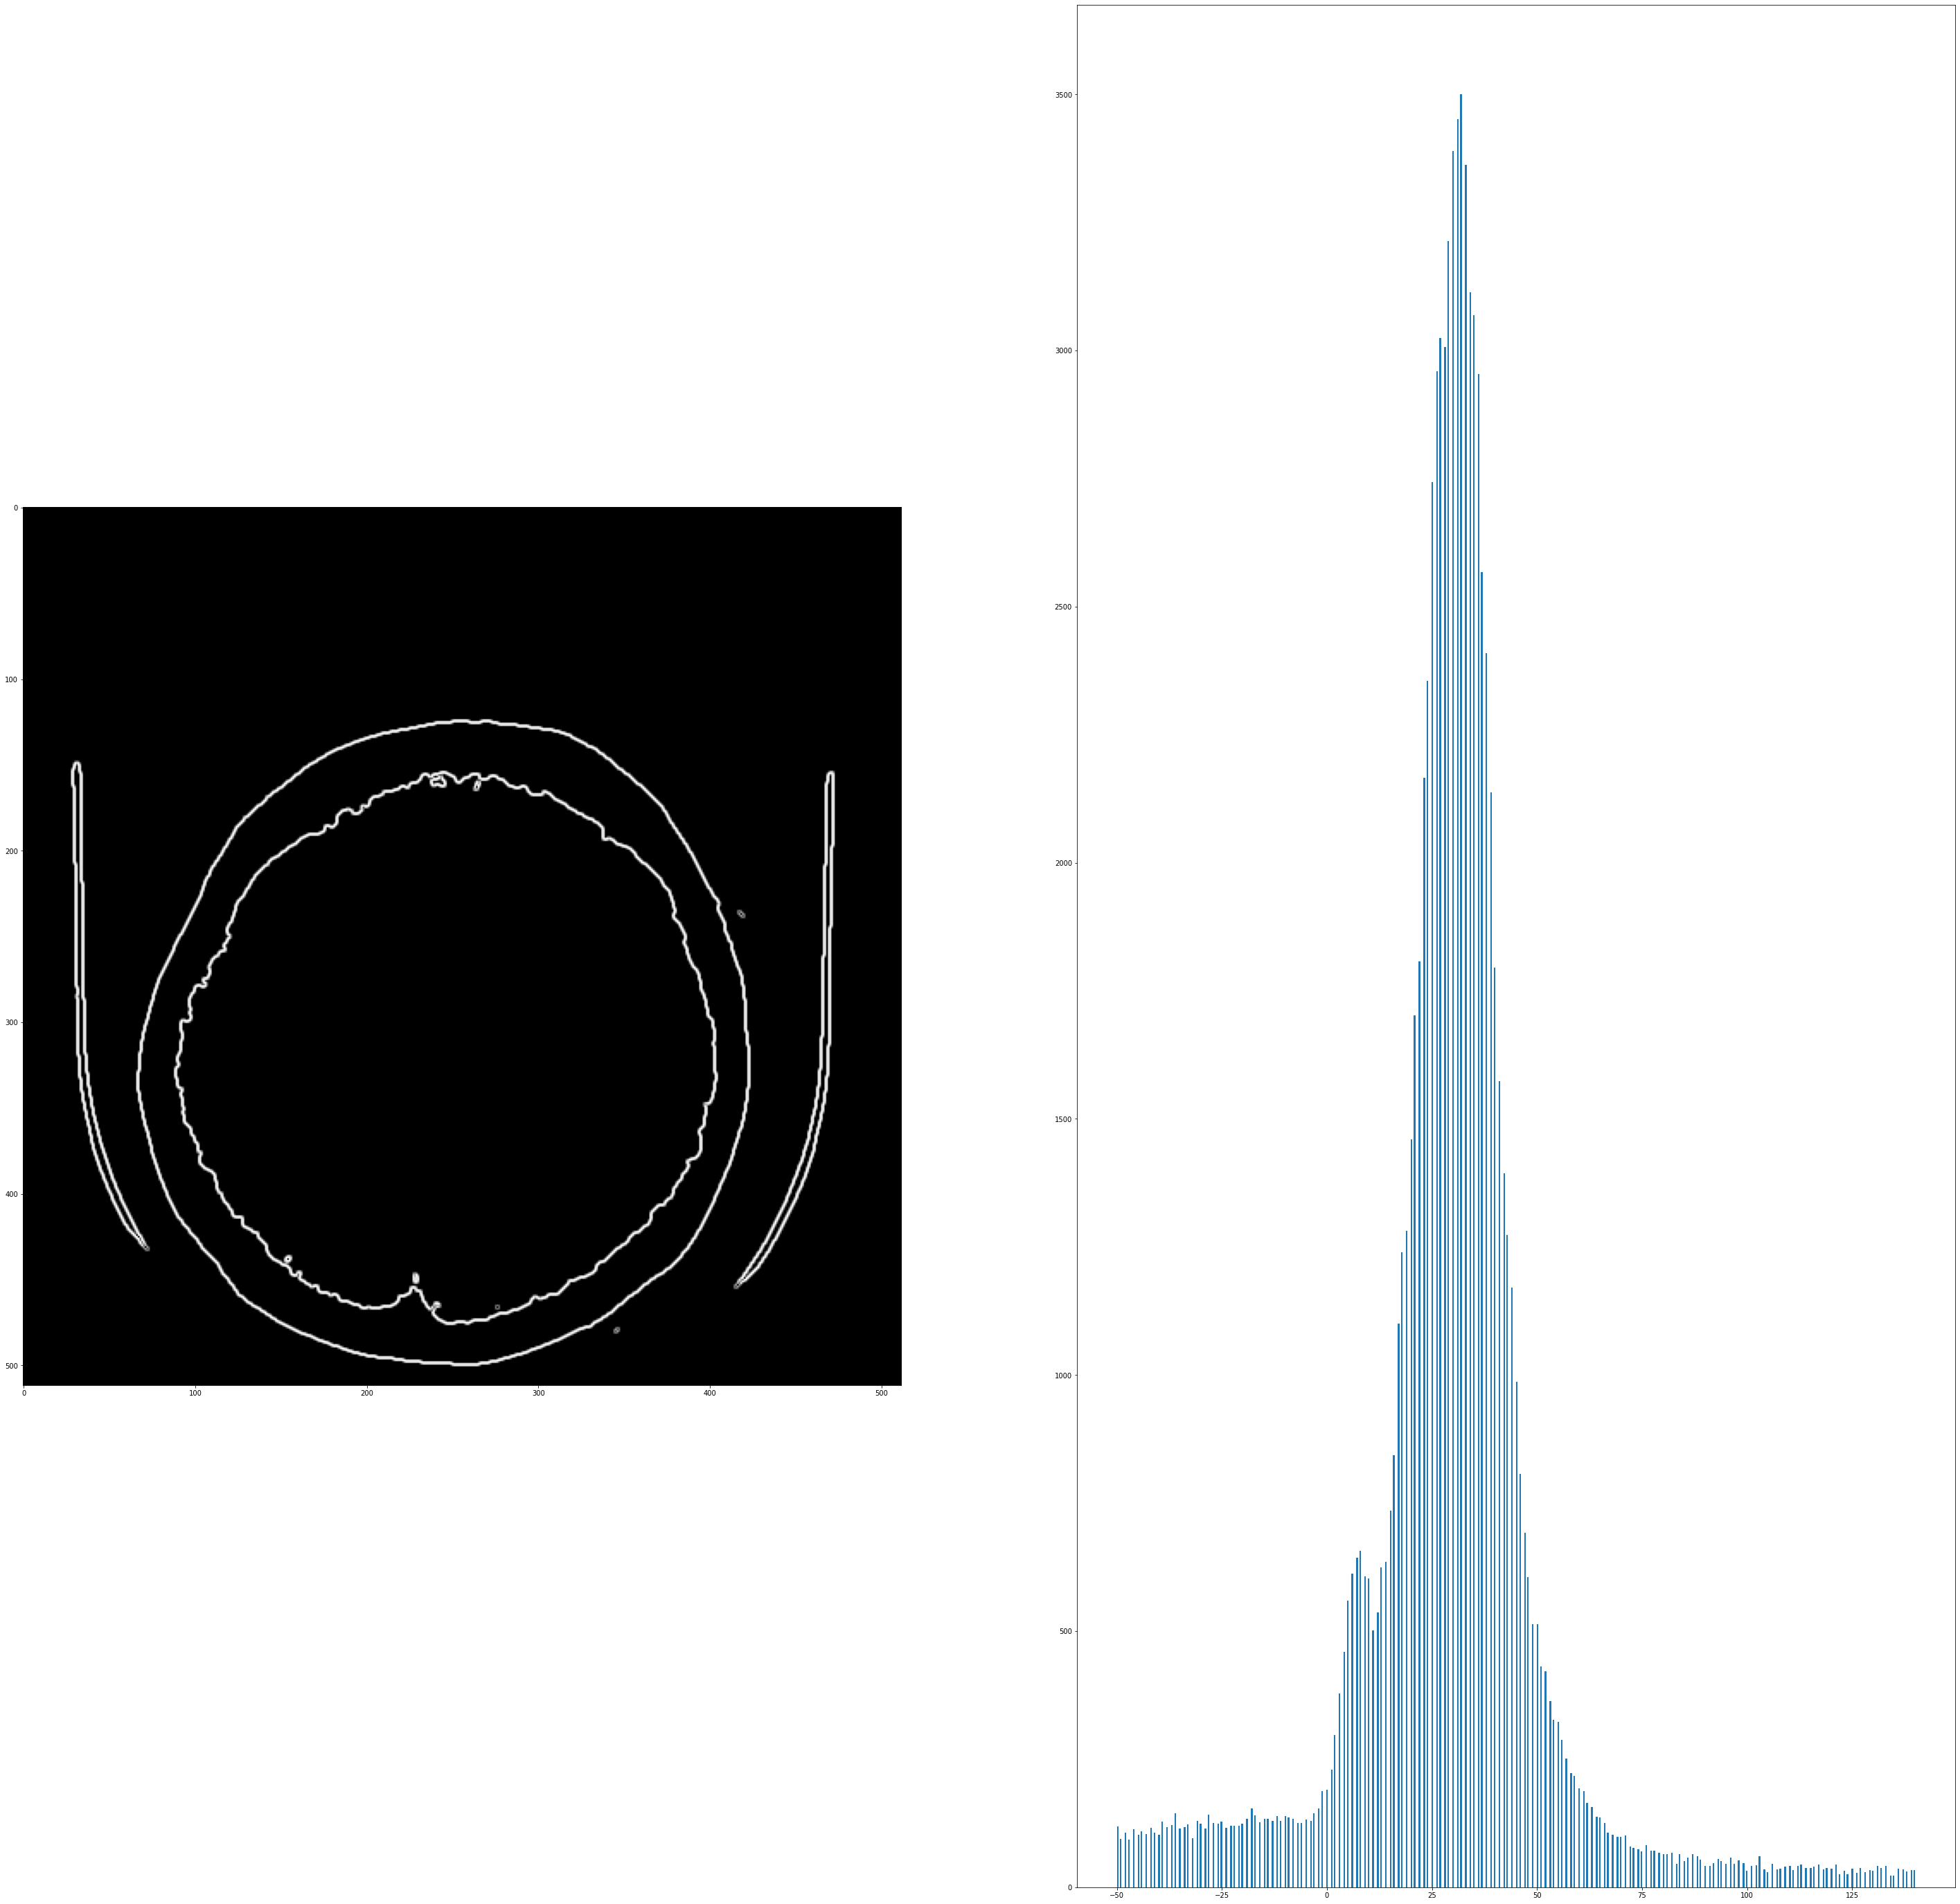

In [10]:
edges = sobel(binary_img_1)
fig,ax = plt.subplots(1,2,figsize=(50,50))
ax[0].imshow(edges,cmap = "gray")
ax[1].hist(img_dc.pixel_array.ravel(),500,[-50,140])


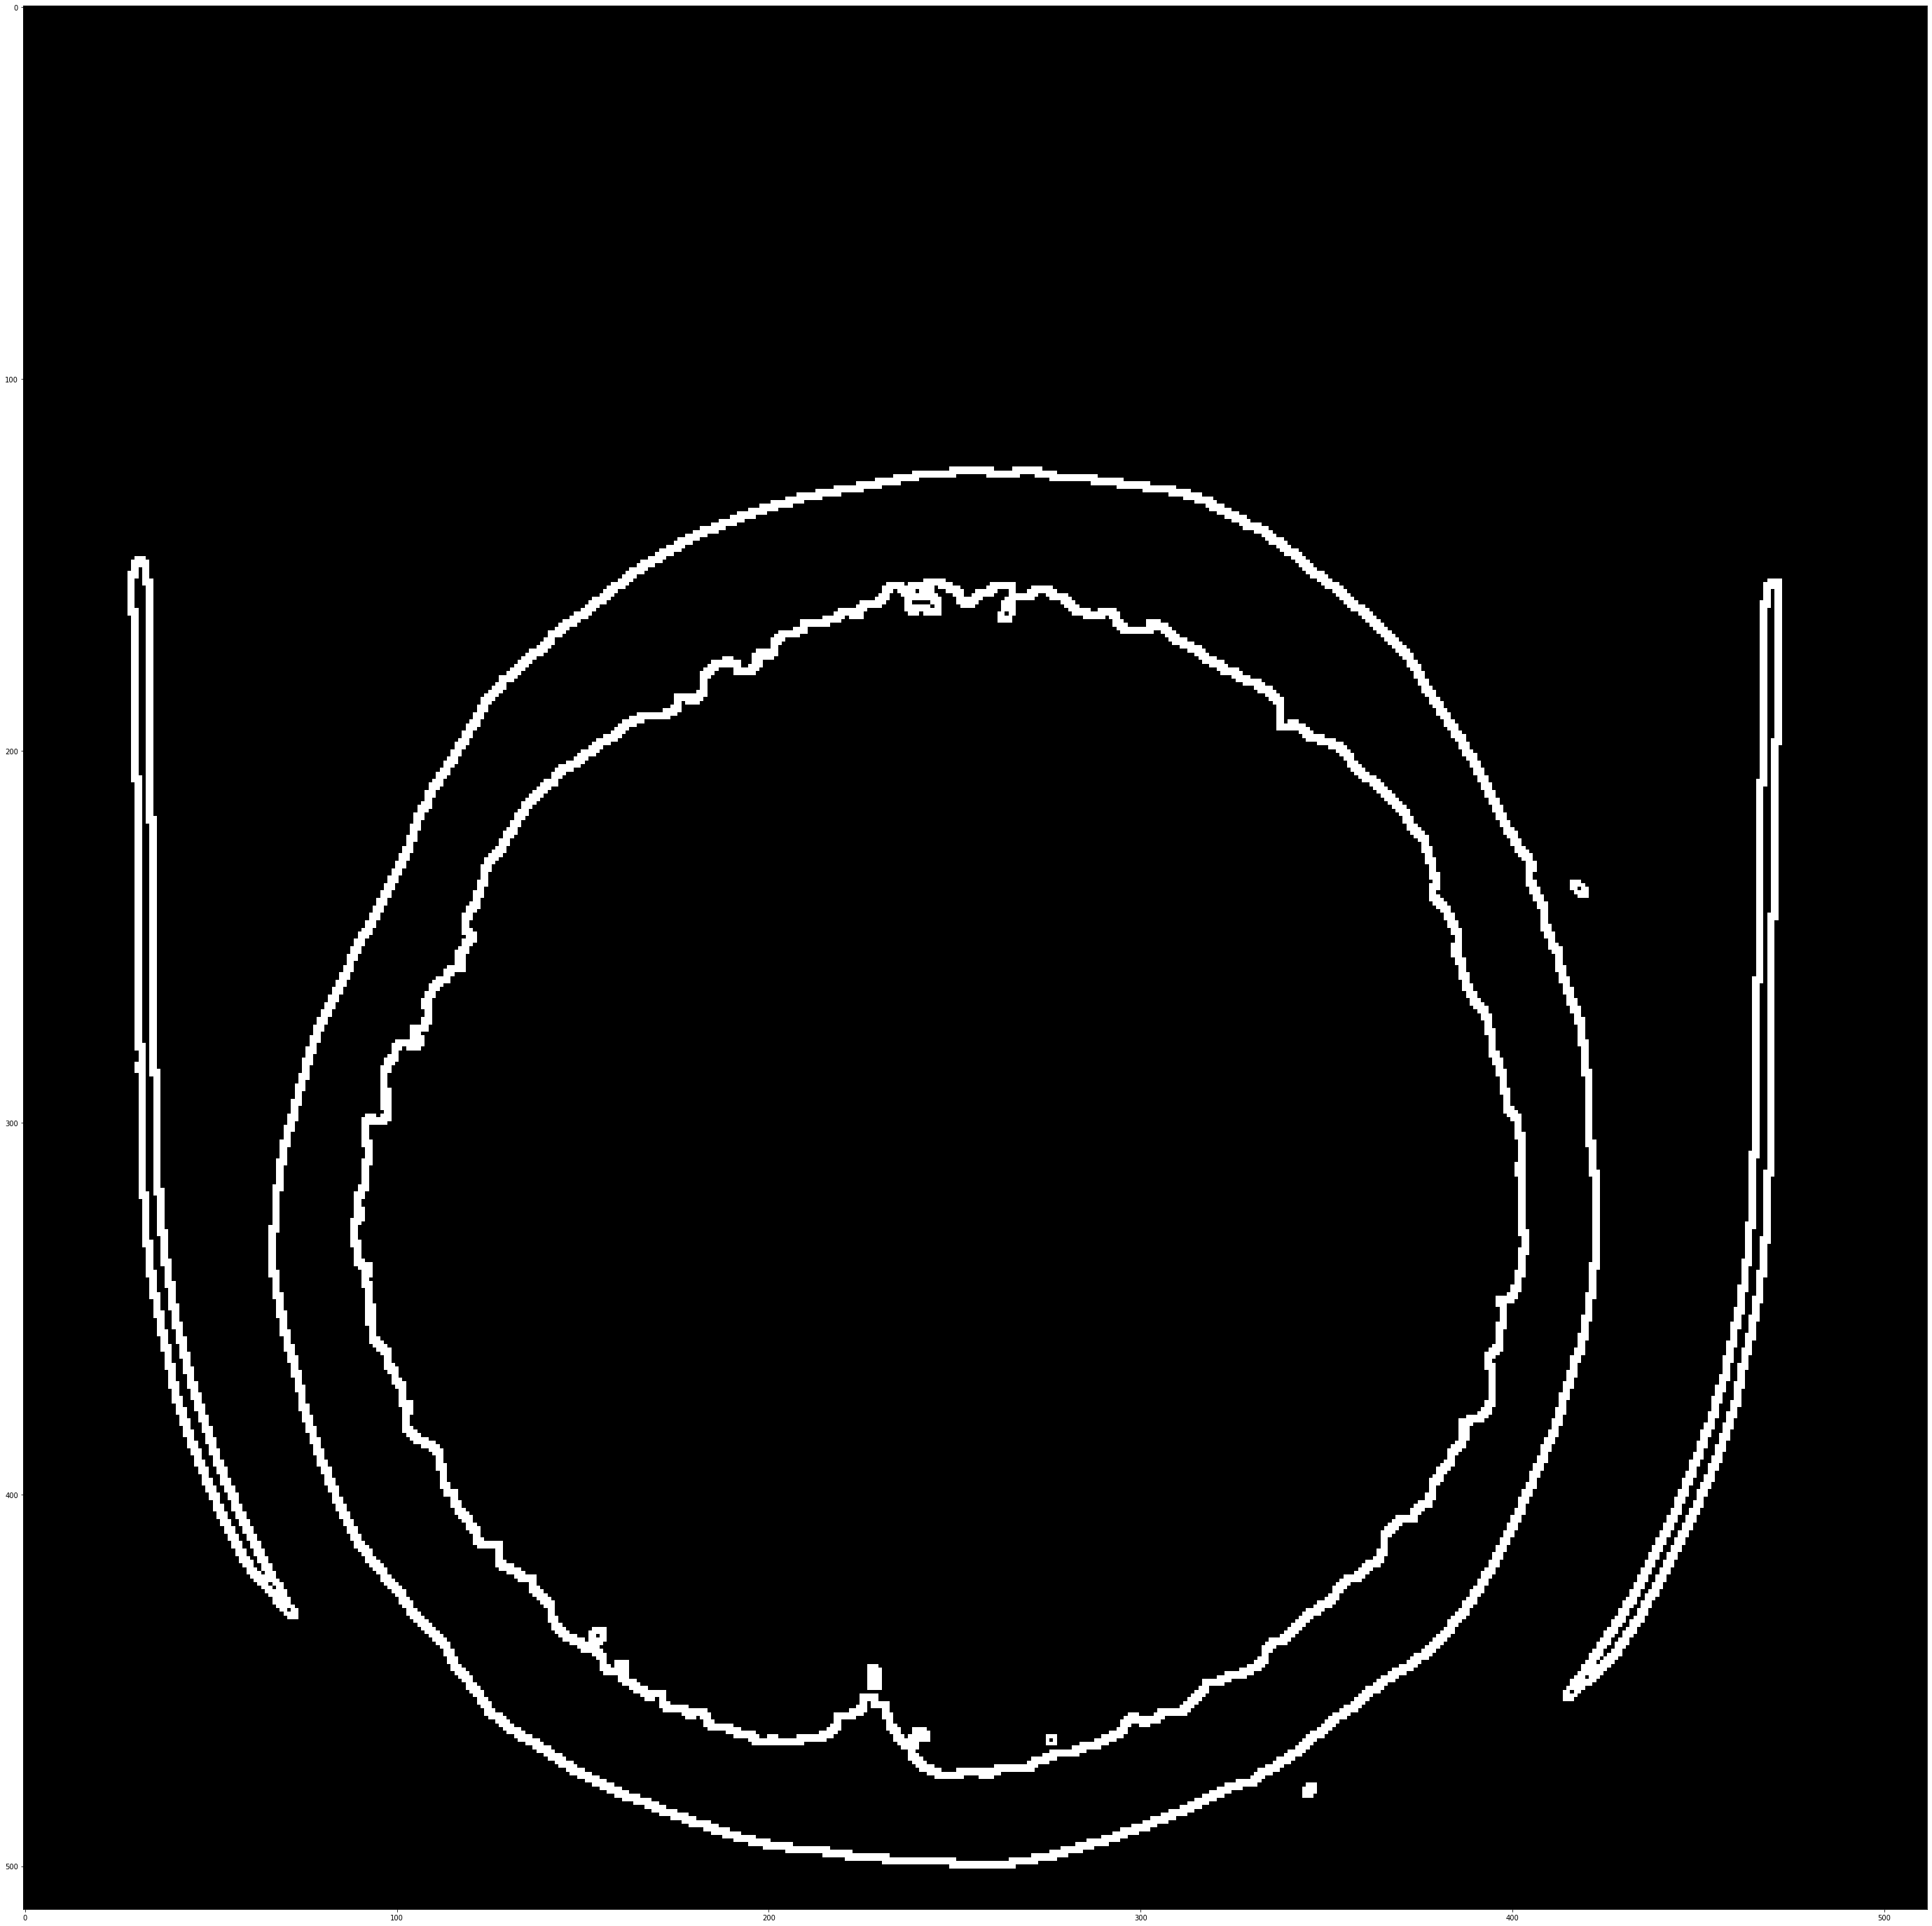

In [11]:
arraynp = np.where(edges >=0.25,1,0)
fig,ax = plt.subplots(figsize=(50,50))
ax.imshow(arraynp,cmap = "gray")


state = 0 # 0 Means wating for the first, 1 waiting for the second
pixel_jumps = 1
indice_x = 0
indice_y = 0
count = 0
intern_count = 0
arraynp_trans = np.transpose(arraynp)
for x in arraynp:
    buffer = pixel_jumps
    for y in x:
        if y == 1 and state == 0:
            state = 1
            buffer = pixel_jumps
            intern_count+=1
            continue
        if state == 1:
            count+=1
            if buffer == 0:
                if y == 0:
                    count+=1
                    arraynp[indice_x,indice_y+intern_count] = 1
                else:
                    state = 0
                    
            else:
                if y == 1 and state == 1:
                    state = 0
                buffer -= 1
        indice_y+=1
    state = 0
    indice_y = 0
    intern_count = 0
    indice_x+=1
fig,ax = plt.subplots(figsize=(50,50))
ax.imshow(arraynp,cmap = "gray")
print(indice_y)

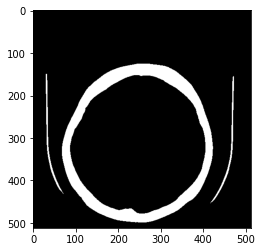

In [12]:
img_2 = pydicom.dcmread(path).pixel_array

#limiarização binária com limiar 230
_, img_2_th = cv2.threshold(img_2, 100, 1000, cv2.THRESH_BINARY) 
plt.imshow(img_2_th, cmap="gray")

### Operações de floodfill e bitwise para fazer uma mascara da região interna da cabeça

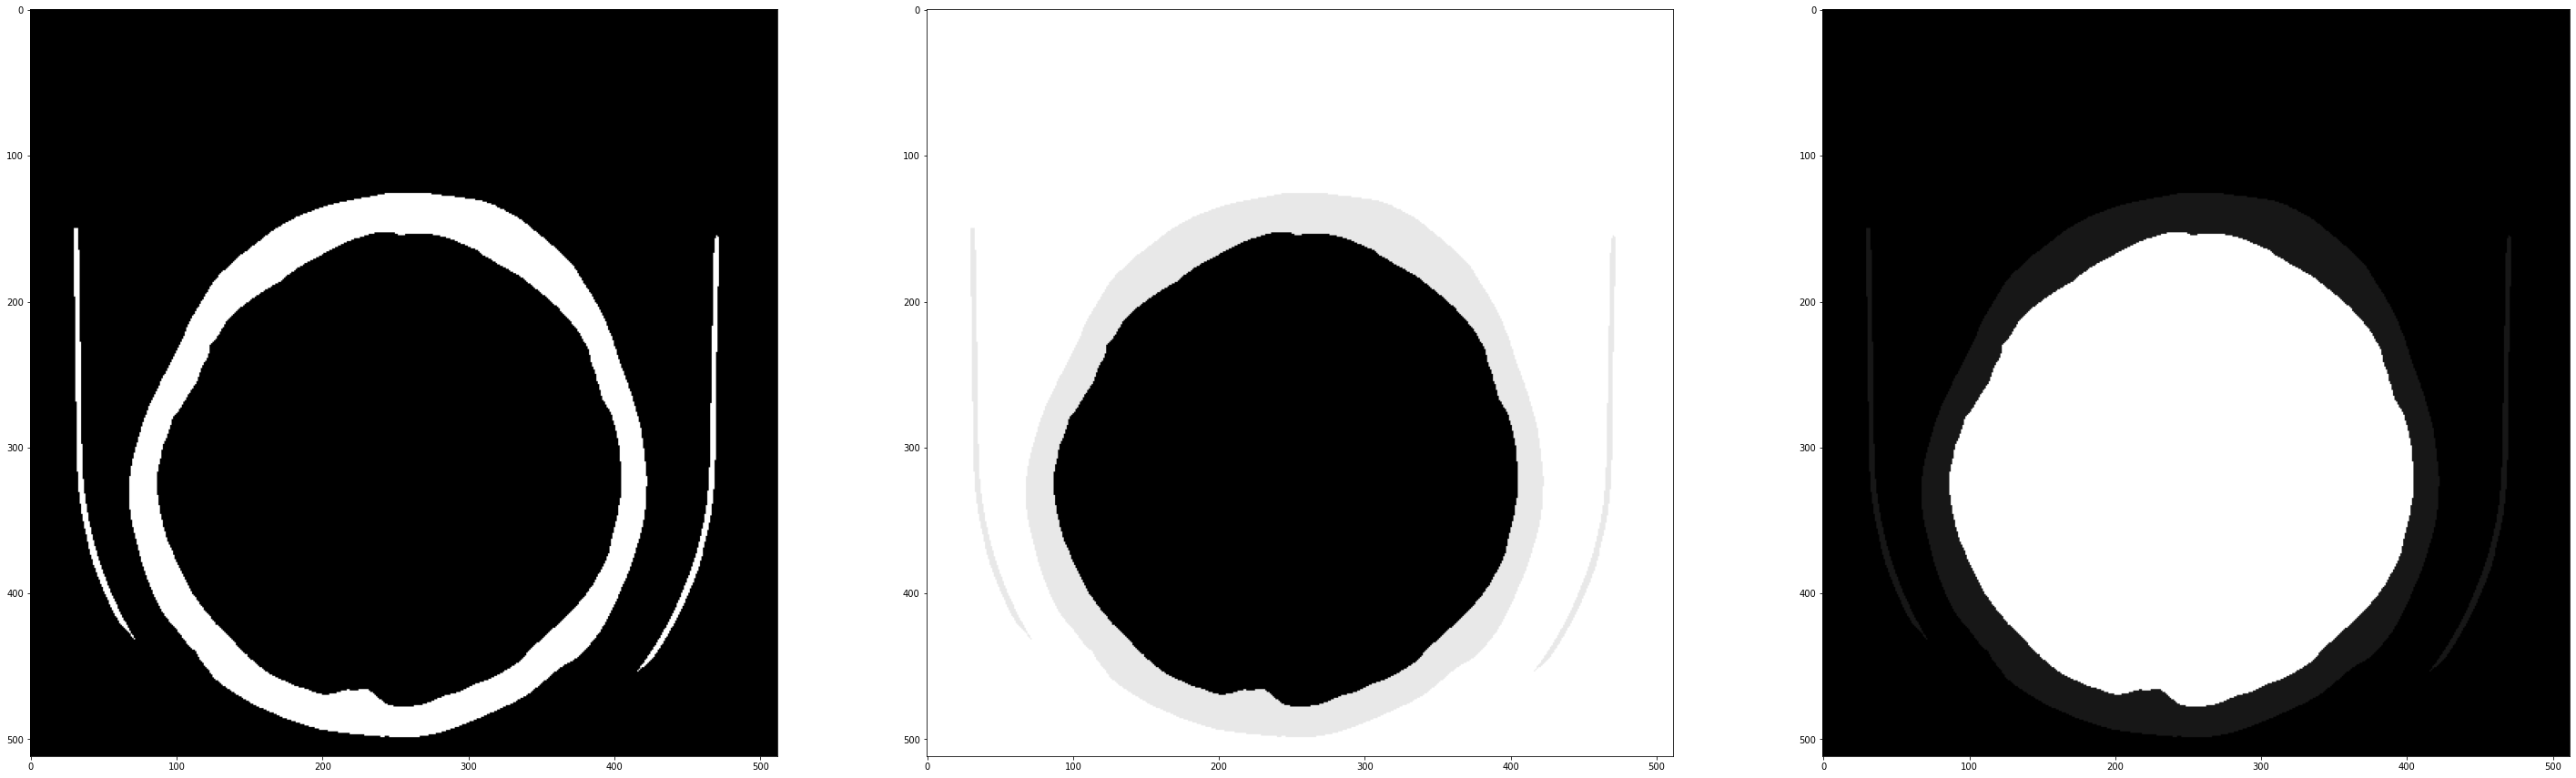

In [15]:
im_floodfill = make_jan(image = img_2_th, janelamento = np.arange(0,1001))
im_floodfill = im_floodfill.astype(np.uint8)

# máscara para aplicação do floodfill
h, w = img_2_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

# preenchimento externo
cv2.floodFill(im_floodfill, None, (0,0), 255);

# inversão da imagem
im_floodfill_inv = cv2.bitwise_not(im_floodfill)

fig,ax = plt.subplots(1,3,figsize=(50,50))
ax[0].imshow(img_2_th,cmap = "gray")
ax[1].imshow(im_floodfill,cmap = "gray")
ax[2].imshow(im_floodfill_inv,cmap = "gray")

In [13]:
mask.shape

(514, 514)

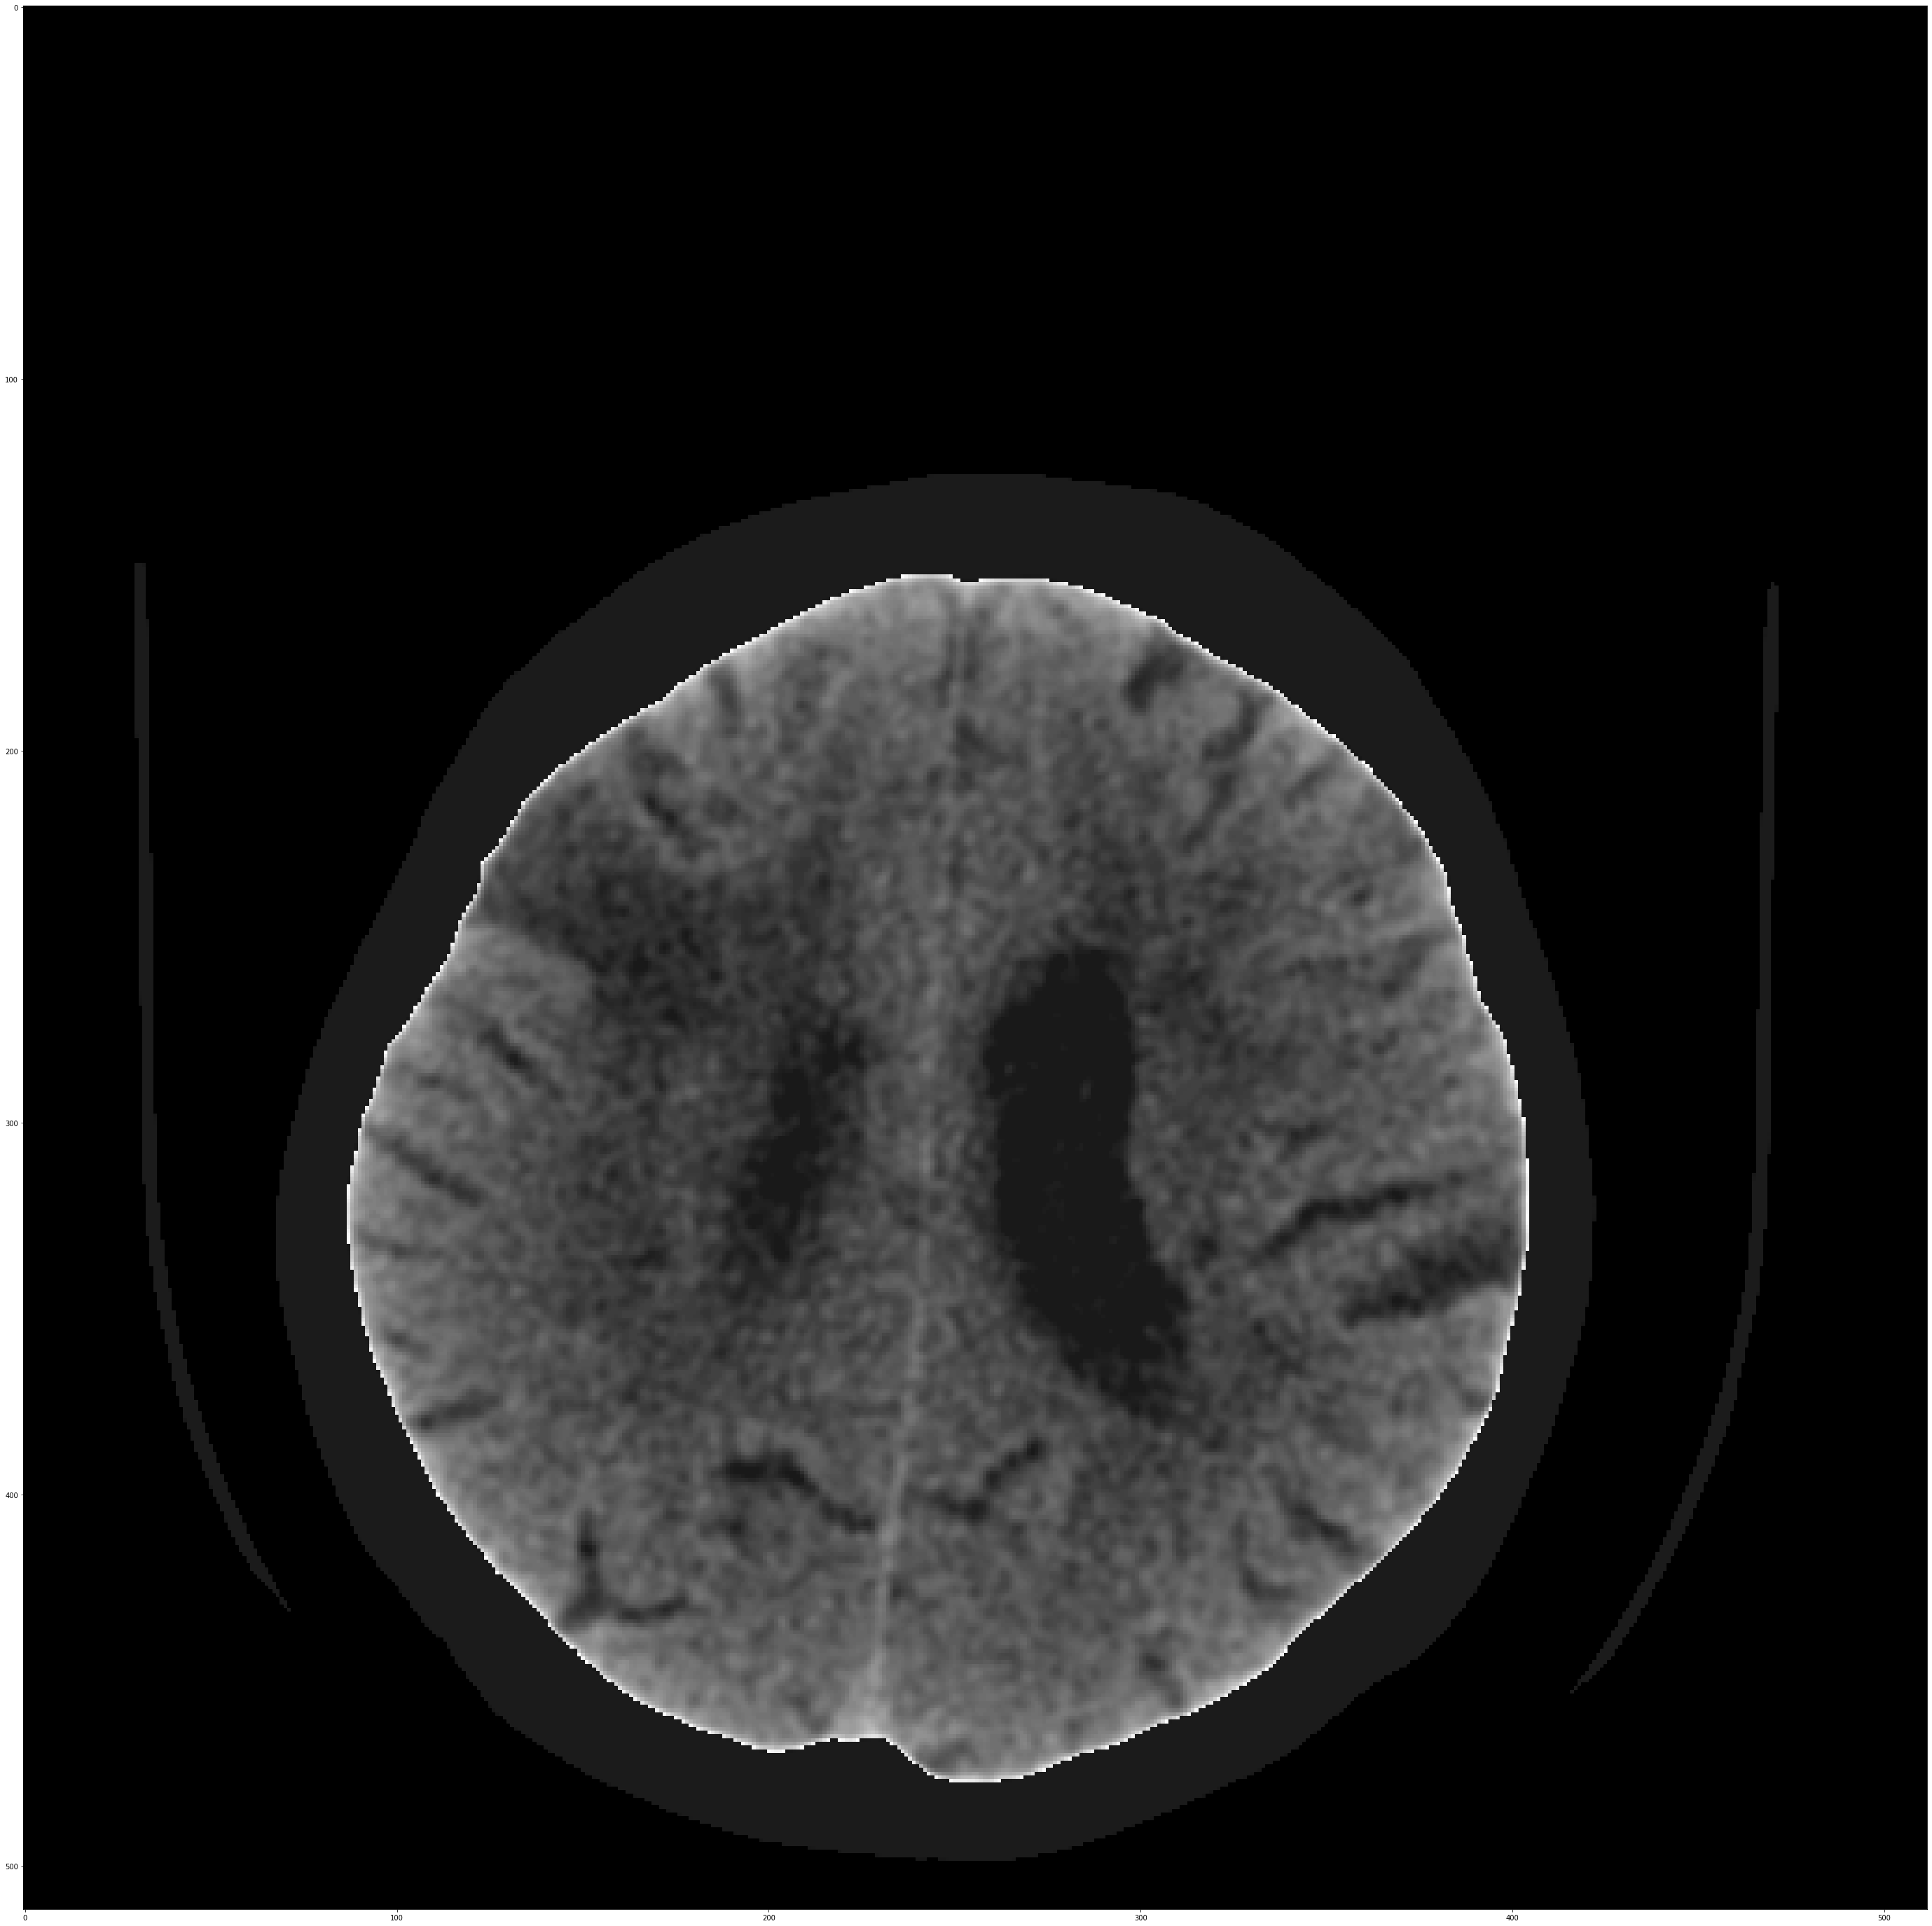

In [18]:
img_pat = img_jan*im_floodfill_inv
ig,ax = plt.subplots(figsize=(50,50))
ax.imshow(img_pat,cmap = "gray")

### Calculando a média com o kernel 5x5:

In [15]:
media = cv2.blur(img_jan,(5,5))
media_list = []
for x in media:
    for y in x:
        if y not in media_list:
            media_list.append(y)
media

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## Algoritmo para remover o ventrículo

(512, 512)

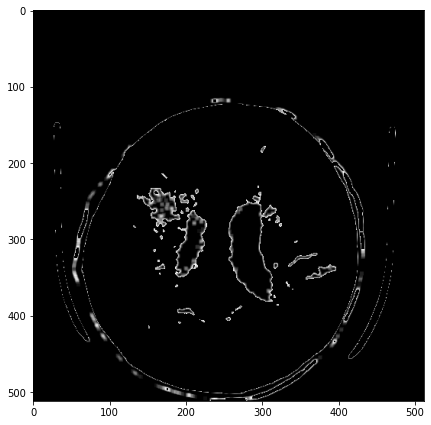

In [16]:
media = np.where(media<17,media,0)
ig,ax = plt.subplots(figsize=(7,50))
ax.imshow(media,cmap = "gray")
media.shape


### Isolando a patologia com uma operação de bitwise

In [17]:
media.shape

(512, 512)

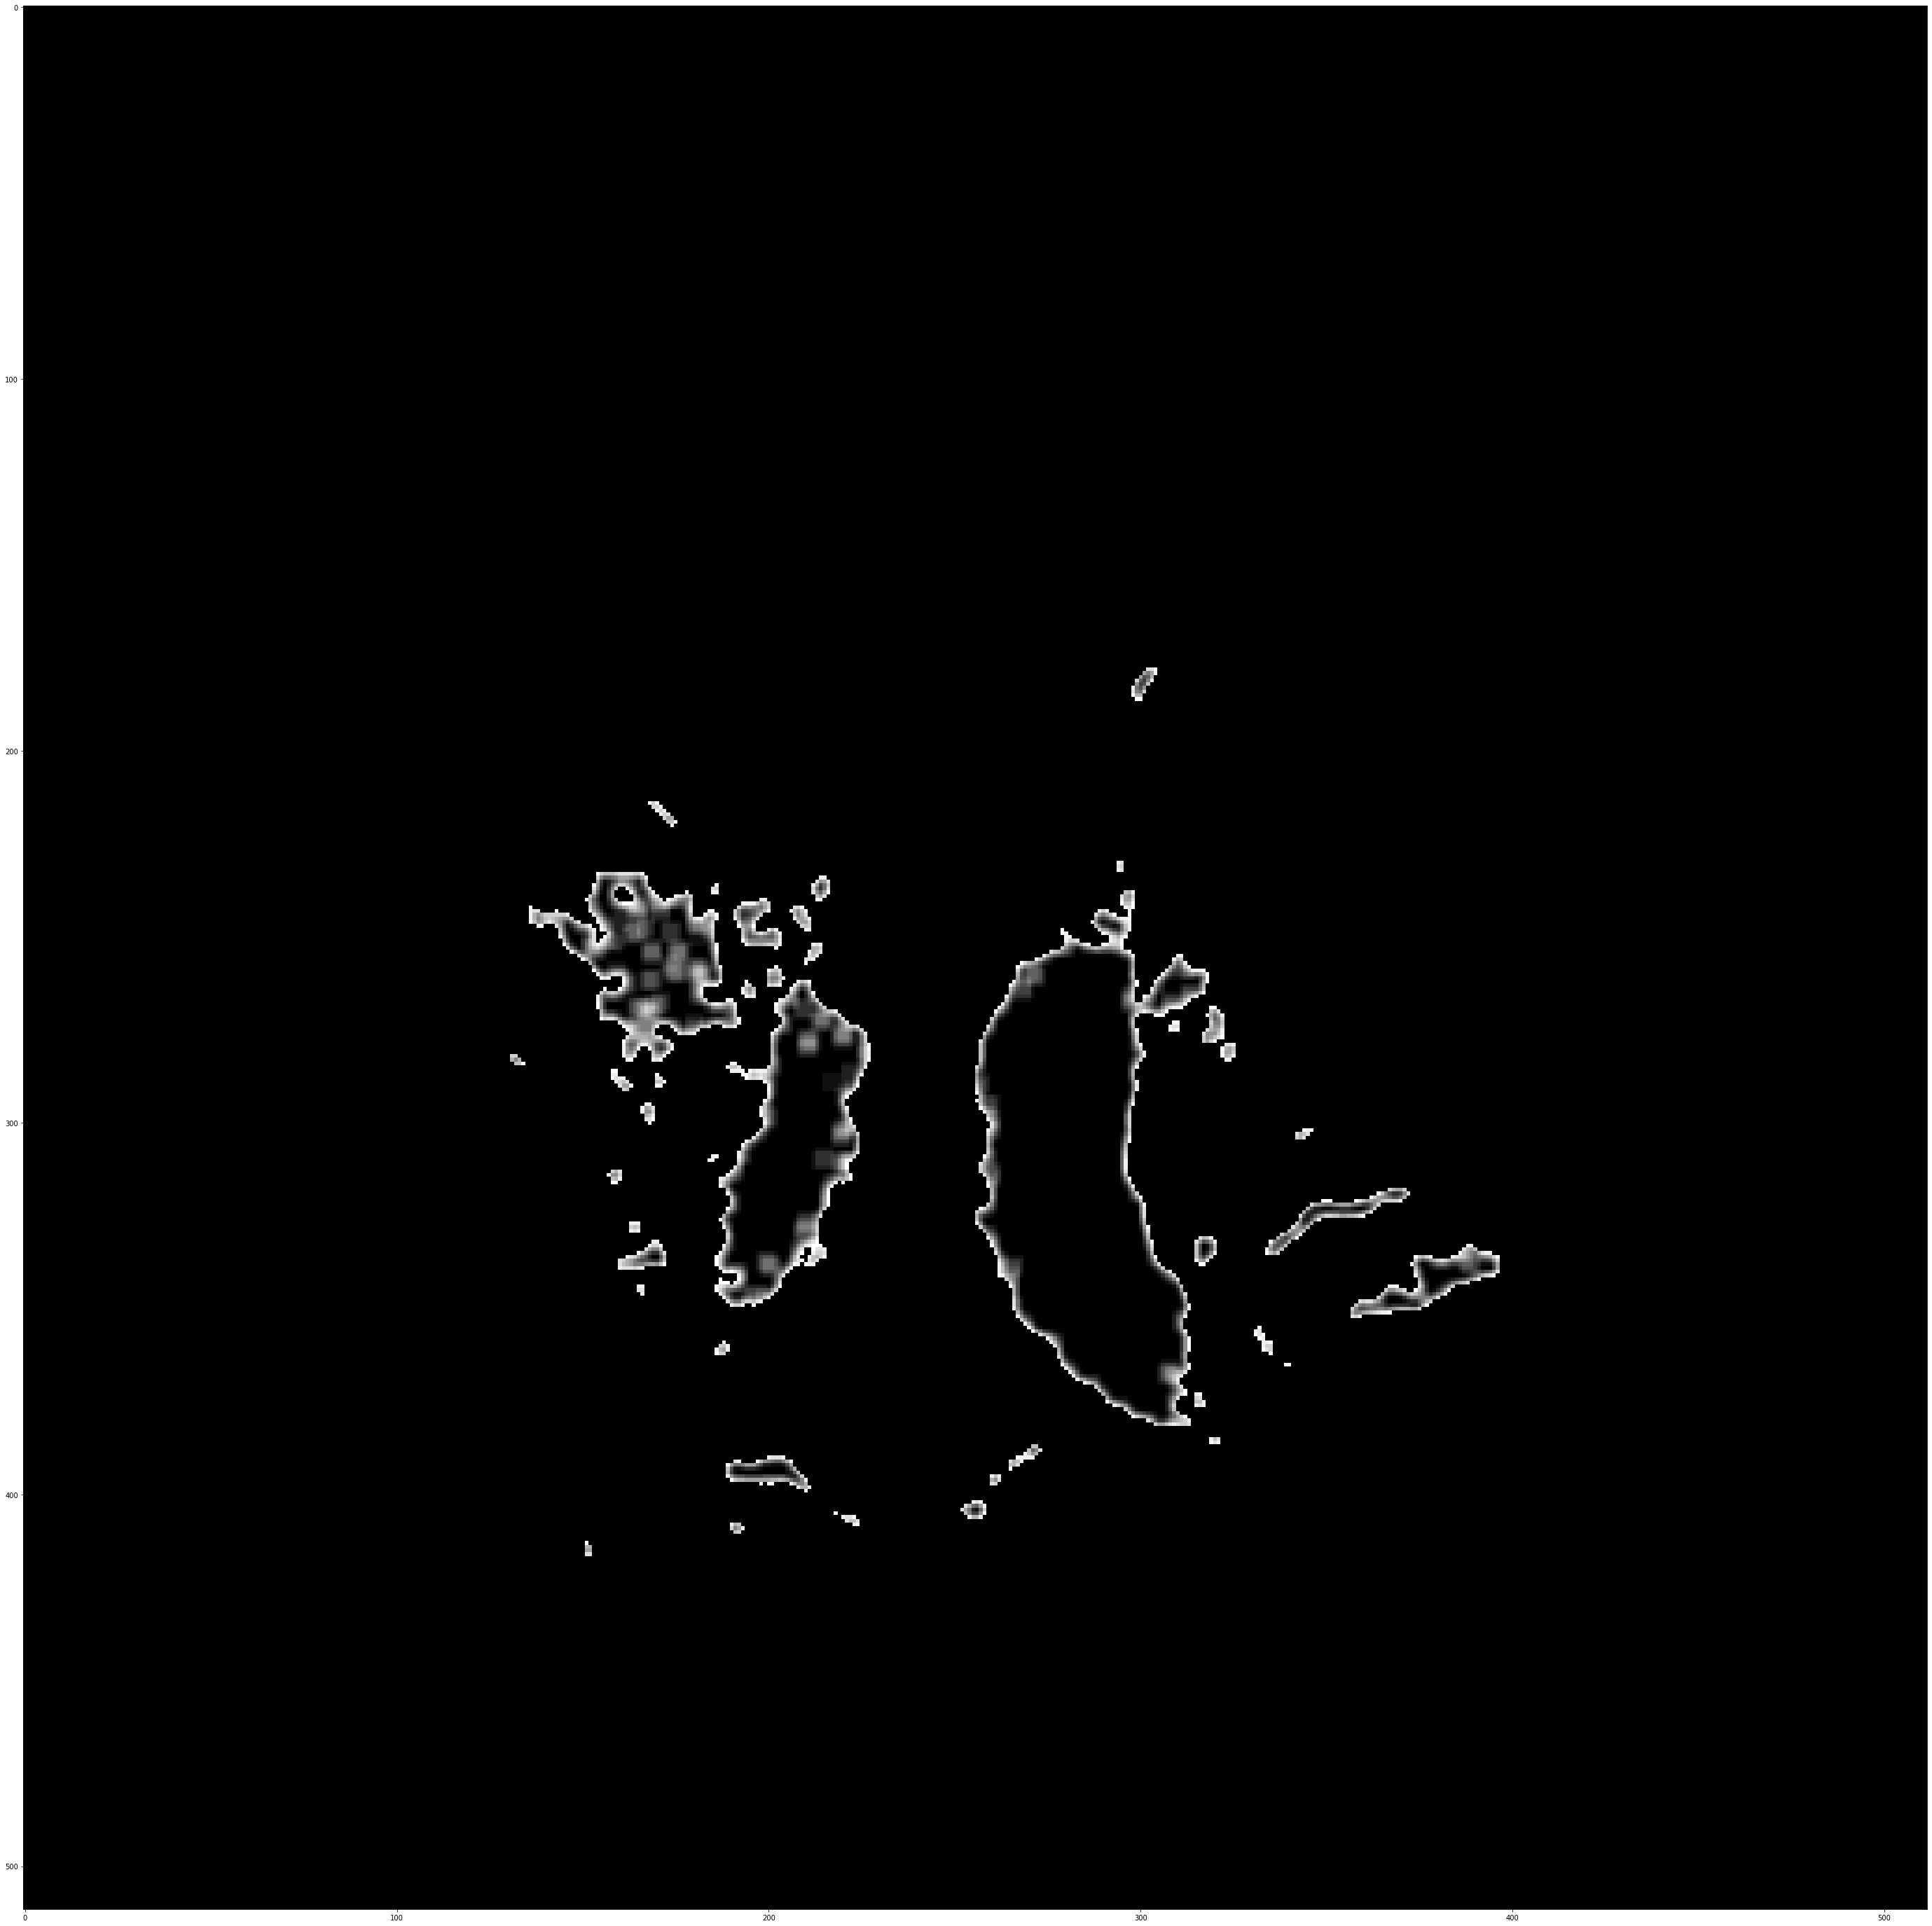

In [18]:
resultimage = cv2.bitwise_and(media,im_floodfill_inv, mask = None)
ig,ax = plt.subplots(figsize=(50,50))
ax.imshow(resultimage,cmap = "gray")

### Erosão para retirar pequenos erros

In [19]:
#number = 11
#kernel = np.ones((2,1))
#image_eroded = cv2.erode(resultimage, kernel,iterations = 2)
#image_dilated = cv2.dilate(image_eroded,kernel,iterations = 10)
#ig,ax = plt.subplots(1,2,figsize=(50,50))
#ax[0].imshow(image_eroded,cmap = "gray")
#ax[1].imshow(image_dilated,cmap = "gray")

###  Preenchimento da patologia para marcação na imagem

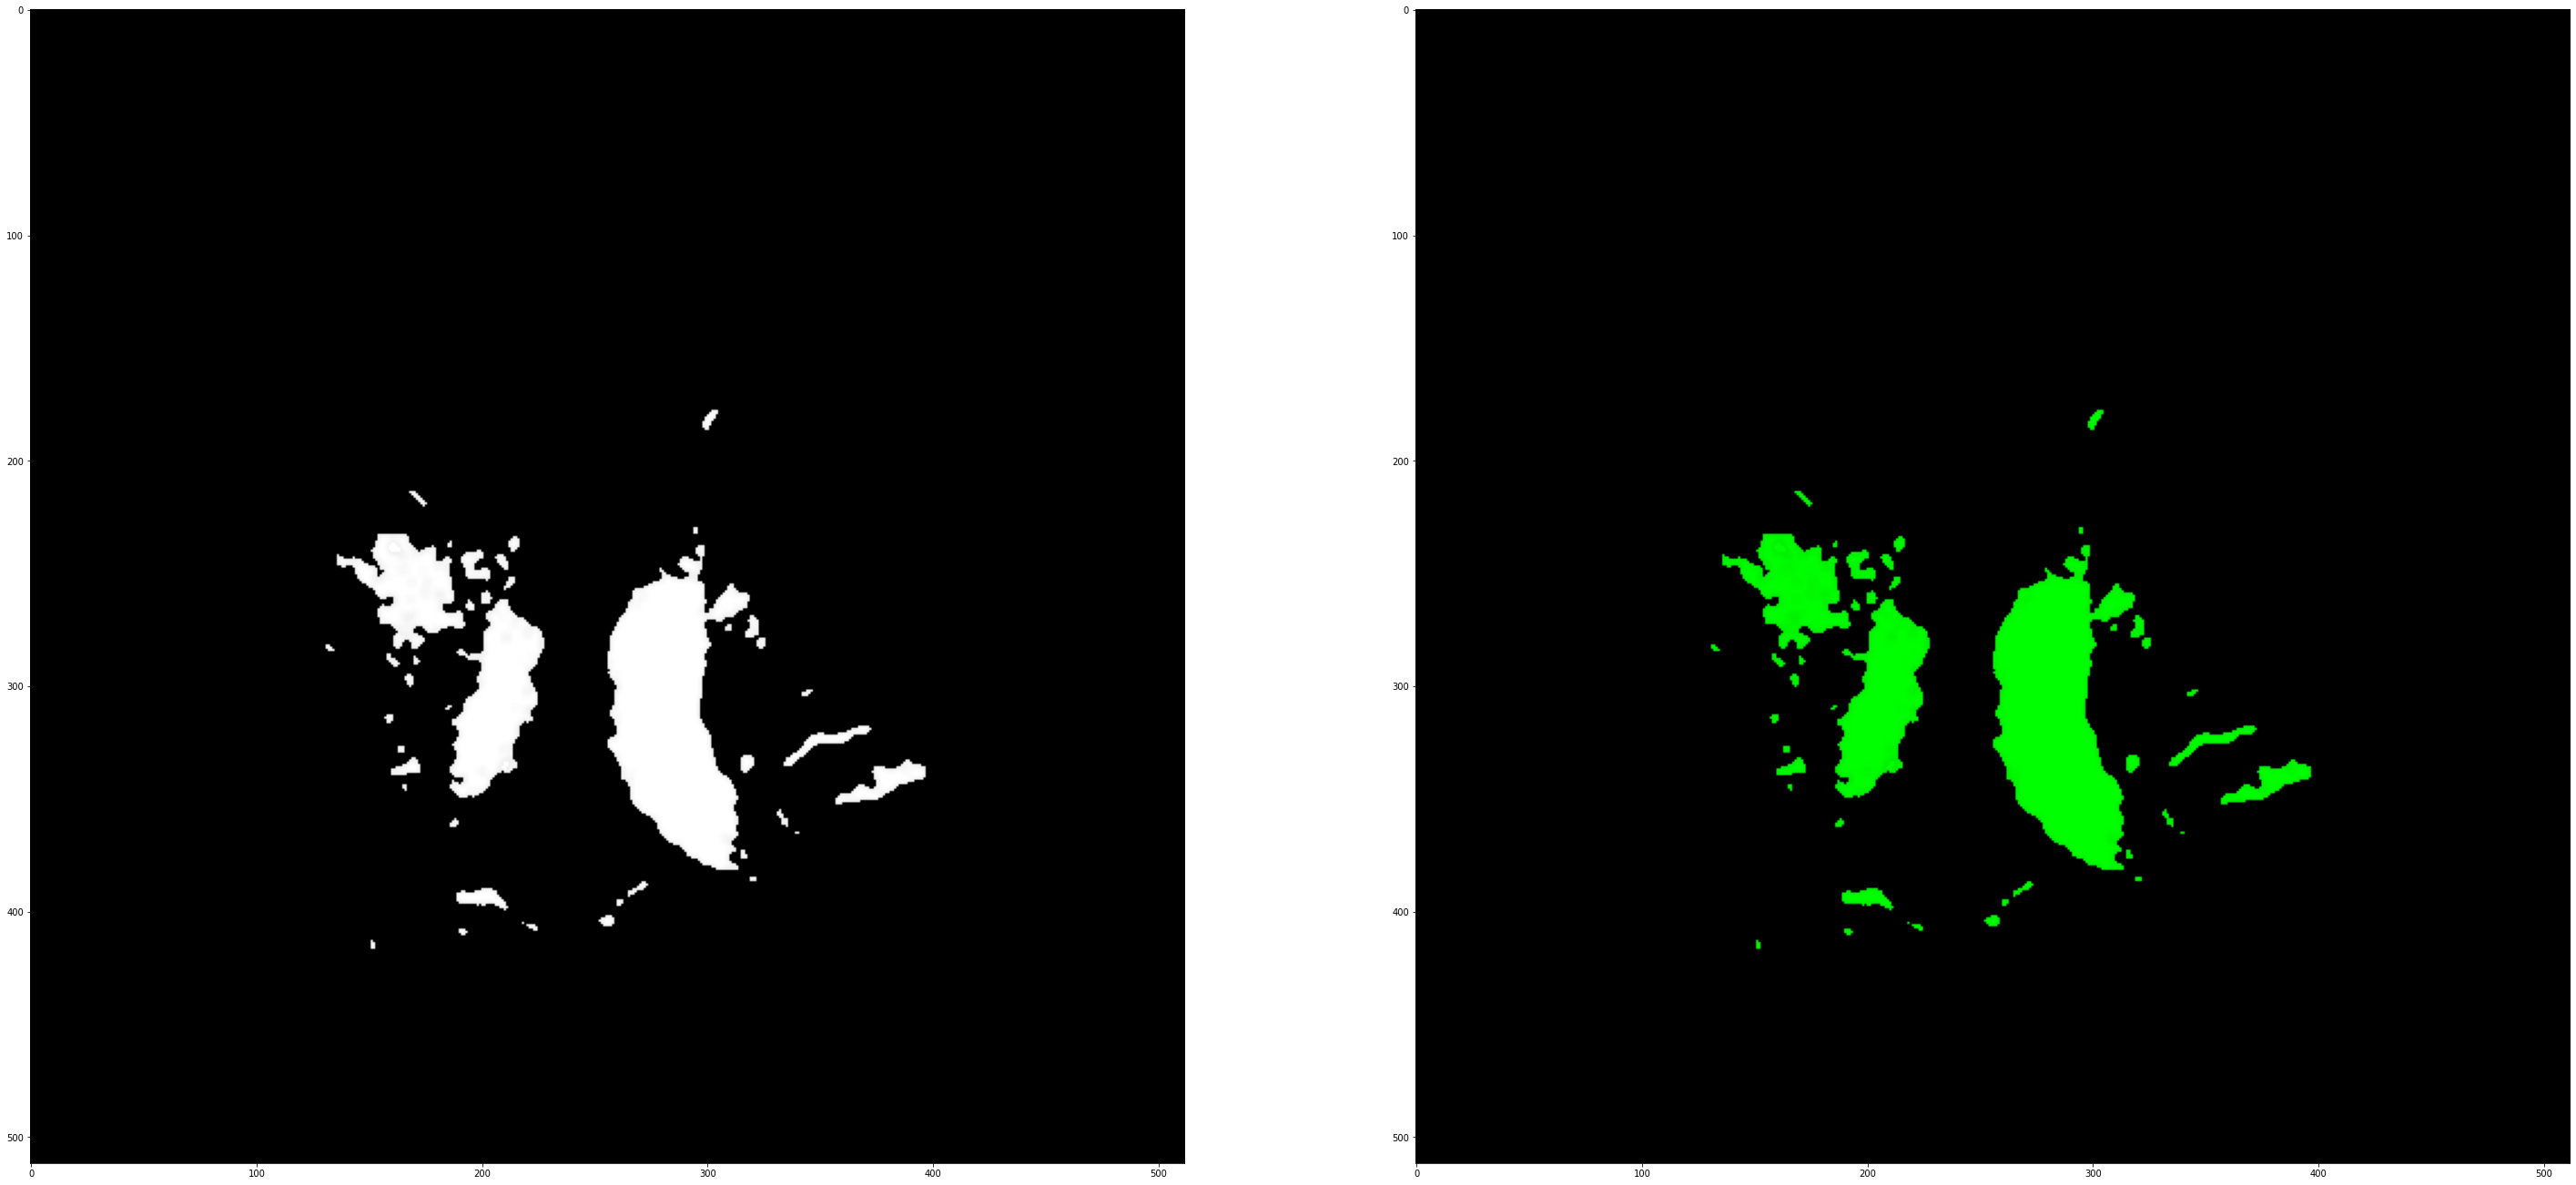

In [20]:
img_to_floodfill = resultimage.copy()
img_floodfill = cv2.floodFill(img_to_floodfill,None,(0,0),255)
inv_floodfill = cv2.bitwise_not(img_floodfill[1])
mask = cv2.cvtColor(inv_floodfill,cv2.COLOR_GRAY2BGR)
mask[:,:,0] = 0
mask[:,:,2] = 0
fig,ax = plt.subplots(1,2,figsize=(50,50))
ax[0].imshow(inv_floodfill,cmap = "gray")
ax[1].imshow(mask,cmap = "gray")

### Juntando a mascara com a imagem original para ter a marcação da patologia em verde

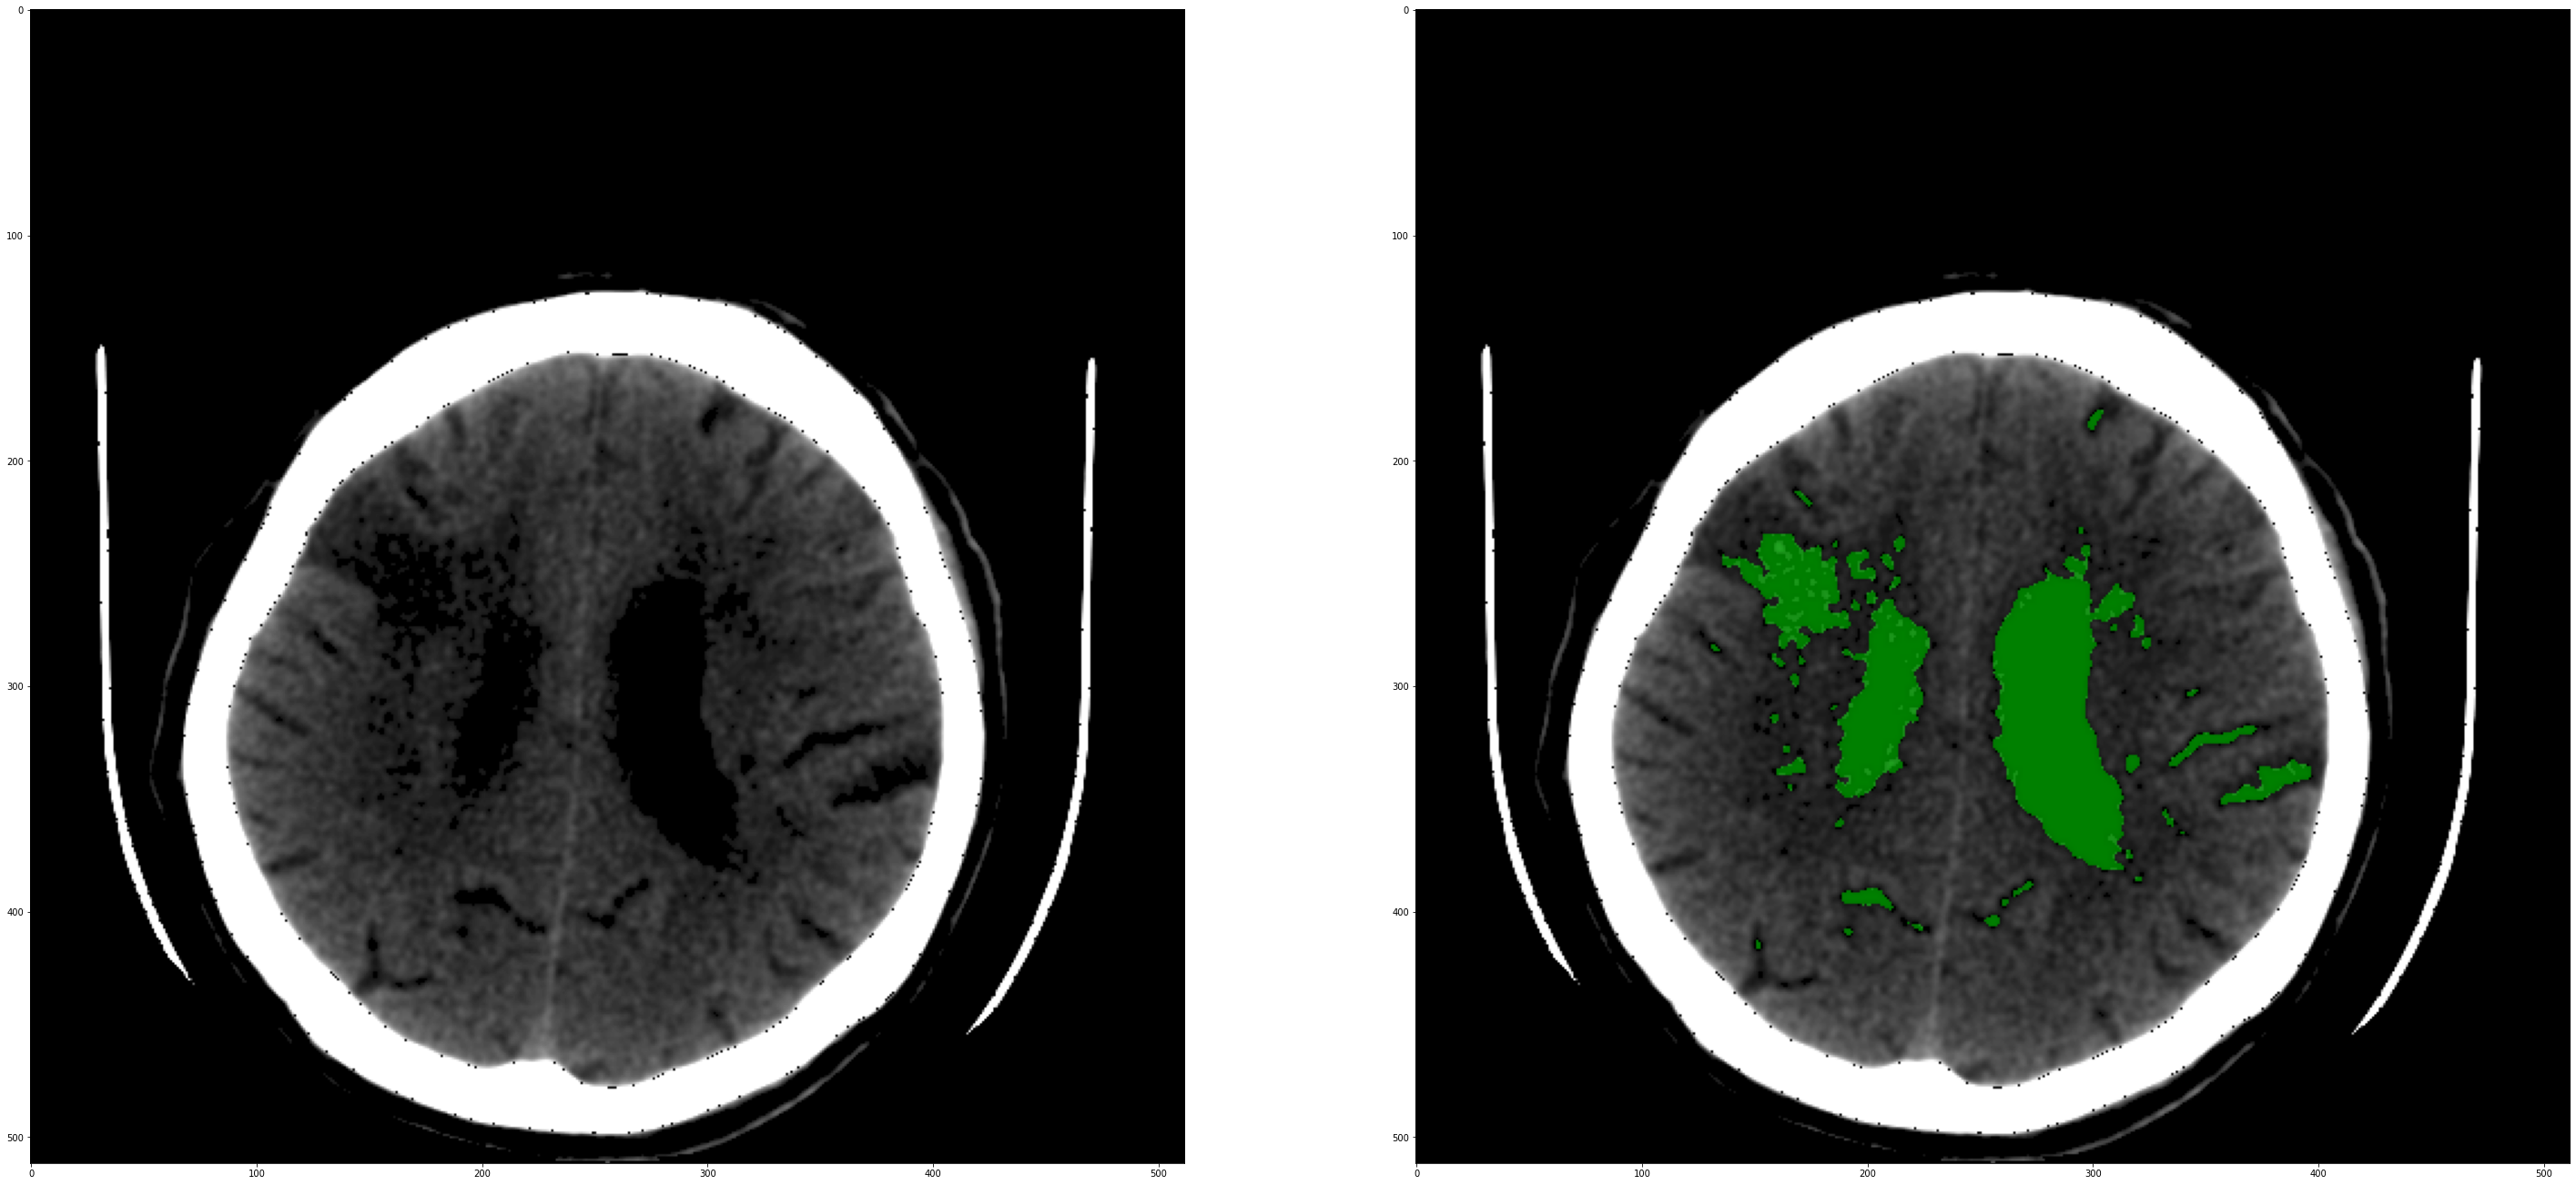

In [21]:
final_image = cv2.addWeighted(cv2.cvtColor(img_jan,cv2.COLOR_GRAY2BGR),1,mask,0.5,0)
fig,ax = plt.subplots(1,2,figsize=(50,50))
ax[0].imshow(img_jan,cmap = "gray")
ax[1].imshow(final_image,cmap = "gray")
